In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

In [2]:
Grid0121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_011121.csv')
Grid0221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020121.csv')
Grid0321 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030121.csv')
Grid0421 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_040121.csv')
Grid0521 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_050121.csv')
Grid0621 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_060121.csv')
Grid0721 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_070121.csv')
Grid0821 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_080121.csv')
Grid0921 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_090121.csv')
Grid1021 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_100121.csv')
Grid1121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_110121.csv')
Grid1221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_120121.csv')
Grid0122 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_010122.csv')
Grid0222 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020122.csv')

PV0121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_011121.csv')
PV0221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020121.csv')
PV0321 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030121.csv')
PV0421 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_040121.csv')
PV0521 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_050121.csv')
PV0621 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_060121.csv')
PV0721 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_070121.csv')
PV0821 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_080121.csv')
PV0921 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_090121.csv')
PV1021 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_100121.csv')
PV1121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_110121.csv')
PV1221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_120121.csv')
PV0122 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_010122.csv')
PV0222 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020122.csv')

In [3]:
def extract_data(data_in):
    data_out = data_in.drop(['No', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'PF1', 'PF2', 'PF3', 'F'], axis=1)
    data_out['Power'] = data_out['P1'] + data_out['P2'] + data_out['P3']
    data_out['Timediff'] = data_out.diff()['Time']
    data_out['Energy'] = data_out['Power'] * data_out['Timediff']
    data_out.loc[:,'Time'] = pd.to_datetime(data_out.loc[:,'Time'],unit='s')
    data_out.drop([0], axis=0, inplace=True)
    df = data_out.set_index(['Time'])
    data = df[['Energy']].groupby(pd.Grouper(freq='1H')).sum()
    data['Energy_kWh'] = data['Energy'] / 3600000
    return data

In [4]:
Grid0121_hourly = extract_data(Grid0121)
Grid0221_hourly = extract_data(Grid0221)
Grid0321_hourly = extract_data(Grid0321)
Grid0421_hourly = extract_data(Grid0421)
Grid0521_hourly = extract_data(Grid0521)
Grid0621_hourly = extract_data(Grid0621)
Grid0721_hourly = extract_data(Grid0721)
Grid0821_hourly = extract_data(Grid0821)
Grid0921_hourly = extract_data(Grid0921)
Grid1021_hourly = extract_data(Grid1021)
Grid1121_hourly = extract_data(Grid1121)
Grid1221_hourly = extract_data(Grid1221)
Grid0122_hourly = extract_data(Grid0122)
Grid0222_hourly = extract_data(Grid0222)

PV0121_hourly = extract_data(PV0121)
PV0221_hourly = extract_data(PV0221)
PV0321_hourly = extract_data(PV0321)
PV0421_hourly = extract_data(PV0421)
PV0521_hourly = extract_data(PV0521)
PV0621_hourly = extract_data(PV0621)
PV0721_hourly = extract_data(PV0721)
PV0821_hourly = extract_data(PV0821)
PV0921_hourly = extract_data(PV0921)
PV1021_hourly = extract_data(PV1021)
PV1121_hourly = extract_data(PV1121)
PV1221_hourly = extract_data(PV1221)
PV0122_hourly = extract_data(PV0122)
PV0222_hourly = extract_data(PV0222)

In [5]:
Grid0121_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 07:00:00,-14812440.0,-4.114567
2020-12-02 08:00:00,-20756430.0,-5.765675
2020-12-02 09:00:00,-14546790.0,-4.040775
2020-12-02 10:00:00,-478860.0,-0.133017
2020-12-02 11:00:00,1555410.0,0.432058
...,...,...
2021-01-11 08:00:00,56160.0,0.015600
2021-01-11 09:00:00,871170.0,0.241992
2021-01-11 10:00:00,1094880.0,0.304133


In [6]:
PV0121_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,623340.0,0.173150
2020-12-02 10:00:00,1487100.0,0.413083
2020-12-02 11:00:00,1524450.0,0.423458
2020-12-02 12:00:00,1039440.0,0.288733
2020-12-02 13:00:00,668910.0,0.185808
...,...,...
2021-01-11 08:00:00,81960.0,0.022767
2021-01-11 09:00:00,843780.0,0.234383
2021-01-11 10:00:00,1061850.0,0.294958


In [7]:
Grid0121_hourly = Grid0121_hourly.iloc[2:,:]

In [8]:
Grid0221_hourly

,Energy,Energy_kWh
Time,,
2021-01-11 12:00:00,424290.0,0.117858
2021-01-11 13:00:00,1324410.0,0.367892
2021-01-11 14:00:00,1066530.0,0.296258
2021-01-11 15:00:00,215490.0,0.059858
2021-01-11 16:00:00,0.0,0.000000
...,...,...
2021-01-31 20:00:00,0.0,0.000000
2021-01-31 21:00:00,0.0,0.000000
2021-01-31 22:00:00,0.0,0.000000


In [9]:
PV0221_hourly 

,Energy,Energy_kWh
Time,,
2021-01-11 12:00:00,541590.0,0.150442
2021-01-11 13:00:00,1222290.0,0.339525
2021-01-11 14:00:00,1025670.0,0.284908
2021-01-11 15:00:00,213030.0,0.059175
2021-01-11 16:00:00,0.0,0.000000
...,...,...
2021-01-31 20:00:00,0.0,0.000000
2021-01-31 21:00:00,0.0,0.000000
2021-01-31 22:00:00,0.0,0.000000


In [10]:
Grid0321_hourly

,Energy,Energy_kWh
Time,,
2021-02-01 03:00:00,0.0,0.000000
2021-02-01 04:00:00,0.0,0.000000
2021-02-01 05:00:00,0.0,0.000000
2021-02-01 06:00:00,0.0,0.000000
2021-02-01 07:00:00,38550.0,0.010708
...,...,...
2021-02-28 21:00:00,0.0,0.000000
2021-02-28 22:00:00,0.0,0.000000
2021-02-28 23:00:00,0.0,0.000000


In [11]:
PV0321_hourly

,Energy,Energy_kWh
Time,,
2021-02-01 03:00:00,0.0,0.000000
2021-02-01 04:00:00,0.0,0.000000
2021-02-01 05:00:00,0.0,0.000000
2021-02-01 06:00:00,0.0,0.000000
2021-02-01 07:00:00,38730.0,0.010758
...,...,...
2021-02-28 20:00:00,0.0,0.000000
2021-02-28 21:00:00,0.0,0.000000
2021-02-28 22:00:00,0.0,0.000000


In [12]:
Grid0321_hourly = Grid0321_hourly.iloc[:670,:]

In [13]:
Grid0421_hourly

,Energy,Energy_kWh
Time,,
2021-03-01 03:00:00,0.0,0.000000
2021-03-01 04:00:00,0.0,0.000000
2021-03-01 05:00:00,0.0,0.000000
2021-03-01 06:00:00,24510.0,0.006808
2021-03-01 07:00:00,1254720.0,0.348533
...,...,...
2021-03-31 19:00:00,0.0,0.000000
2021-03-31 20:00:00,0.0,0.000000
2021-03-31 21:00:00,0.0,0.000000


In [14]:
PV0421_hourly

,Energy,Energy_kWh
Time,,
2021-03-01 03:00:00,0.0,0.000000
2021-03-01 04:00:00,0.0,0.000000
2021-03-01 05:00:00,0.0,0.000000
2021-03-01 06:00:00,15030.0,0.004175
2021-03-01 07:00:00,1185420.0,0.329283
...,...,...
2021-03-31 19:00:00,0.0,0.000000
2021-03-31 20:00:00,0.0,0.000000
2021-03-31 21:00:00,0.0,0.000000


In [15]:
Grid0521_hourly

,Energy,Energy_kWh
Time,,
2021-04-05 02:00:00,0.0,0.000000
2021-04-05 03:00:00,0.0,0.000000
2021-04-05 04:00:00,0.0,0.000000
2021-04-05 05:00:00,71340.0,0.019817
2021-04-05 06:00:00,3230340.0,0.897317
...,...,...
2021-04-30 19:00:00,0.0,0.000000
2021-04-30 20:00:00,0.0,0.000000
2021-04-30 21:00:00,0.0,0.000000


In [16]:
PV0521_hourly

,Energy,Energy_kWh
Time,,
2021-04-05 02:00:00,0.0,0.000000
2021-04-05 03:00:00,0.0,0.000000
2021-04-05 04:00:00,0.0,0.000000
2021-04-05 05:00:00,76650.0,0.021292
2021-04-05 06:00:00,3624060.0,1.006683
...,...,...
2021-04-30 20:00:00,0.0,0.000000
2021-04-30 21:00:00,0.0,0.000000
2021-04-30 22:00:00,0.0,0.000000


In [17]:
PV0521_hourly = PV0521_hourly.iloc[:622,:]

In [18]:
Grid0621_hourly

,Energy,Energy_kWh
Time,,
2021-05-03 02:00:00,0.0,0.000000
2021-05-03 03:00:00,0.0,0.000000
2021-05-03 04:00:00,1681290.0,0.467025
2021-05-03 05:00:00,14509080.0,4.030300
2021-05-03 06:00:00,0.0,0.000000
...,...,...
2021-05-31 19:00:00,307860.0,0.085517
2021-05-31 20:00:00,0.0,0.000000
2021-05-31 21:00:00,0.0,0.000000


In [19]:
PV0621_hourly

,Energy,Energy_kWh
Time,,
2021-05-03 02:00:00,0.0,0.000000
2021-05-03 03:00:00,0.0,0.000000
2021-05-03 04:00:00,1691550.0,0.469875
2021-05-03 05:00:00,23495010.0,6.526392
2021-05-03 06:00:00,0.0,0.000000
...,...,...
2021-05-31 20:00:00,0.0,0.000000
2021-05-31 21:00:00,0.0,0.000000
2021-05-31 22:00:00,0.0,0.000000


In [20]:
PV0621_hourly = PV0621_hourly.iloc[:694,:]

In [21]:
Grid0721_hourly

,Energy,Energy_kWh
Time,,
2021-06-01 00:00:00,0.0,0.000000
2021-06-01 01:00:00,0.0,0.000000
2021-06-01 02:00:00,0.0,0.000000
2021-06-01 03:00:00,274860.0,0.076350
2021-06-01 04:00:00,2353950.0,0.653875
...,...,...
2021-06-30 19:00:00,65100.0,0.018083
2021-06-30 20:00:00,0.0,0.000000
2021-06-30 21:00:00,0.0,0.000000


In [22]:
PV0721_hourly

,Energy,Energy_kWh
Time,,
2021-06-01 00:00:00,0.0,0.000000
2021-06-01 01:00:00,0.0,0.000000
2021-06-01 02:00:00,0.0,0.000000
2021-06-01 03:00:00,290430.0,0.080675
2021-06-01 04:00:00,2256840.0,0.626900
...,...,...
2021-06-30 19:00:00,78300.0,0.021750
2021-06-30 20:00:00,0.0,0.000000
2021-06-30 21:00:00,0.0,0.000000


In [23]:
Grid0821_hourly

,Energy,Energy_kWh
Time,,
2021-07-01 00:00:00,0.0,0.000000
2021-07-01 01:00:00,0.0,0.000000
2021-07-01 02:00:00,0.0,0.000000
2021-07-01 03:00:00,46680.0,0.012967
2021-07-01 04:00:00,112620.0,0.031283
...,...,...
2021-07-31 19:00:00,141570.0,0.039325
2021-07-31 20:00:00,0.0,0.000000
2021-07-31 21:00:00,0.0,0.000000


In [24]:
PV0821_hourly

,Energy,Energy_kWh
Time,,
2021-07-01 00:00:00,0.0,0.000000
2021-07-01 01:00:00,0.0,0.000000
2021-07-01 02:00:00,0.0,0.000000
2021-07-01 03:00:00,15630.0,0.004342
2021-07-01 04:00:00,128850.0,0.035792
...,...,...
2021-07-31 19:00:00,124290.0,0.034525
2021-07-31 20:00:00,0.0,0.000000
2021-07-31 21:00:00,0.0,0.000000


In [25]:
Grid0921_hourly

,Energy,Energy_kWh
Time,,
2021-08-01 04:00:00,570960.0,0.158600
2021-08-01 05:00:00,3828480.0,1.063467
2021-08-01 06:00:00,7057410.0,1.960392
2021-08-01 07:00:00,7494750.0,2.081875
2021-08-01 08:00:00,9241290.0,2.567025
...,...,...
2021-08-31 20:00:00,0.0,0.000000
2021-08-31 21:00:00,0.0,0.000000
2021-08-31 22:00:00,0.0,0.000000


In [26]:
PV0921_hourly

,Energy,Energy_kWh
Time,,
2021-08-01 04:00:00,600930.0,0.166925
2021-08-01 05:00:00,3764130.0,1.045592
2021-08-01 06:00:00,7306110.0,2.029475
2021-08-01 07:00:00,6745500.0,1.873750
2021-08-01 08:00:00,9265140.0,2.573650
...,...,...
2021-08-31 20:00:00,0.0,0.000000
2021-08-31 21:00:00,0.0,0.000000
2021-08-31 22:00:00,0.0,0.000000


In [27]:
Grid1021_hourly

,Energy,Energy_kWh
Time,,
2021-09-01 04:00:00,0.0,0.000000
2021-09-01 05:00:00,459990.0,0.127775
2021-09-01 06:00:00,1131930.0,0.314425
2021-09-01 07:00:00,-12176280.0,-3.382300
2021-09-01 08:00:00,1277940.0,0.354983
...,...,...
2021-09-30 19:00:00,0.0,0.000000
2021-09-30 20:00:00,0.0,0.000000
2021-09-30 21:00:00,0.0,0.000000


In [28]:
PV1021_hourly

,Energy,Energy_kWh
Time,,
2021-09-01 04:00:00,0.0,0.000000
2021-09-01 05:00:00,536370.0,0.148992
2021-09-01 06:00:00,3293160.0,0.914767
2021-09-01 07:00:00,8457600.0,2.349333
2021-09-01 08:00:00,12863610.0,3.573225
...,...,...
2021-09-30 19:00:00,0.0,0.000000
2021-09-30 20:00:00,0.0,0.000000
2021-09-30 21:00:00,0.0,0.000000


In [29]:
Grid1121_hourly

,Energy,Energy_kWh
Time,,
2021-10-01 04:00:00,0.0,0.000000
2021-10-01 05:00:00,38370.0,0.010658
2021-10-01 06:00:00,-23789040.0,-6.608067
2021-10-01 07:00:00,-59033340.0,-16.398150
2021-10-01 08:00:00,-35422920.0,-9.839700
...,...,...
2021-10-31 20:00:00,0.0,0.000000
2021-10-31 21:00:00,0.0,0.000000
2021-10-31 22:00:00,0.0,0.000000


In [30]:
PV1121_hourly

,Energy,Energy_kWh
Time,,
2021-10-01 04:00:00,0.0,0.000000
2021-10-01 05:00:00,48420.0,0.013450
2021-10-01 06:00:00,5620440.0,1.561233
2021-10-01 07:00:00,15887310.0,4.413142
2021-10-01 08:00:00,15052050.0,4.181125
...,...,...
2021-10-31 21:00:00,0.0,0.000000
2021-10-31 22:00:00,0.0,0.000000
2021-10-31 23:00:00,0.0,0.000000


In [31]:
PV1121_hourly = PV1121_hourly.iloc[:741,:]

In [32]:
Grid1221_hourly

,Energy,Energy_kWh
Time,,
2021-11-01 05:00:00,0.0,0.000000
2021-11-01 06:00:00,-3579300.0,-0.994250
2021-11-01 07:00:00,-46496310.0,-12.915642
2021-11-01 08:00:00,-46311120.0,-12.864200
2021-11-01 09:00:00,-26532540.0,-7.370150
...,...,...
2021-11-30 20:00:00,0.0,0.000000
2021-11-30 21:00:00,0.0,0.000000
2021-11-30 22:00:00,0.0,0.000000


In [33]:
PV1221_hourly

,Energy,Energy_kWh
Time,,
2021-11-01 05:00:00,0.0,0.000000
2021-11-01 06:00:00,497580.0,0.138217
2021-11-01 07:00:00,8361660.0,2.322683
2021-11-01 08:00:00,33784440.0,9.384567
2021-11-01 09:00:00,27234270.0,7.565075
...,...,...
2021-11-30 20:00:00,0.0,0.000000
2021-11-30 21:00:00,0.0,0.000000
2021-11-30 22:00:00,0.0,0.000000


In [34]:
Grid0122_hourly

,Energy,Energy_kWh
Time,,
2021-12-01 17:00:00,-11602200.0,-3.222833
2021-12-01 18:00:00,-39142800.0,-10.873000
2021-12-01 19:00:00,-34525770.0,-9.590492
2021-12-01 20:00:00,0.0,0.000000
2021-12-01 21:00:00,0.0,0.000000
...,...,...
2021-12-31 20:00:00,0.0,0.000000
2021-12-31 21:00:00,0.0,0.000000
2021-12-31 22:00:00,0.0,0.000000


In [35]:
PV0122_hourly

,Energy,Energy_kWh
Time,,
2021-12-01 17:00:00,0.0,0.0
2021-12-01 18:00:00,0.0,0.0
2021-12-01 19:00:00,0.0,0.0
2021-12-01 20:00:00,0.0,0.0
2021-12-01 21:00:00,0.0,0.0
...,...,...
2021-12-31 21:00:00,0.0,0.0
2021-12-31 22:00:00,0.0,0.0
2021-12-31 23:00:00,0.0,0.0


In [36]:
PV0122_hourly = PV0122_hourly.iloc[:728,:]

In [37]:
Grid0222_hourly

,Energy,Energy_kWh
Time,,
2022-01-01 01:00:00,0.0,0.0
2022-01-01 02:00:00,0.0,0.0
2022-01-01 03:00:00,0.0,0.0
2022-01-01 04:00:00,0.0,0.0
2022-01-01 05:00:00,0.0,0.0
...,...,...
2022-01-31 21:00:00,0.0,0.0
2022-01-31 22:00:00,0.0,0.0
2022-01-31 23:00:00,0.0,0.0


In [38]:
PV0222_hourly

,Energy,Energy_kWh
Time,,
2022-01-01 01:00:00,0.0,0.0
2022-01-01 02:00:00,0.0,0.0
2022-01-01 03:00:00,0.0,0.0
2022-01-01 04:00:00,0.0,0.0
2022-01-01 05:00:00,0.0,0.0
...,...,...
2022-01-31 21:00:00,0.0,0.0
2022-01-31 22:00:00,0.0,0.0
2022-01-31 23:00:00,0.0,0.0


In [39]:
print(len(Grid0121_hourly) == len(PV0121_hourly))
print(len(Grid0221_hourly) == len(PV0221_hourly))
print(len(Grid0321_hourly) == len(PV0321_hourly))
print(len(Grid0421_hourly) == len(PV0421_hourly))
print(len(Grid0521_hourly) == len(PV0521_hourly))
print(len(Grid0621_hourly) == len(PV0621_hourly))
print(len(Grid0721_hourly) == len(PV0721_hourly))
print(len(Grid0821_hourly) == len(PV0821_hourly))
print(len(Grid0921_hourly) == len(PV0921_hourly))
print(len(Grid1021_hourly) == len(PV1021_hourly))
print(len(Grid1121_hourly) == len(PV1121_hourly))
print(len(Grid1221_hourly) == len(PV1221_hourly))
print(len(Grid0122_hourly) == len(PV0122_hourly))
print(len(Grid0222_hourly) == len(PV0222_hourly))

True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [40]:
Grid_hourly_raw = pd.concat([Grid0121_hourly, Grid0221_hourly, Grid0321_hourly, Grid0421_hourly, Grid0521_hourly, Grid0621_hourly, Grid0721_hourly, Grid0821_hourly, Grid0921_hourly, Grid1021_hourly, Grid1121_hourly, Grid1221_hourly, Grid0122_hourly, Grid0222_hourly])
PV_hourly_raw = pd.concat([PV0121_hourly, PV0221_hourly, PV0321_hourly, PV0421_hourly, PV0521_hourly, PV0621_hourly, PV0721_hourly, PV0821_hourly, PV0921_hourly, PV1021_hourly, PV1121_hourly, PV1221_hourly, PV0122_hourly, PV0222_hourly])

In [41]:
Grid_hourly_raw

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,-14546790.0,-4.040775
2020-12-02 10:00:00,-478860.0,-0.133017
2020-12-02 11:00:00,1555410.0,0.432058
2020-12-02 12:00:00,1070040.0,0.297233
2020-12-02 13:00:00,647430.0,0.179842
...,...,...
2022-01-31 21:00:00,0.0,0.000000
2022-01-31 22:00:00,0.0,0.000000
2022-01-31 23:00:00,0.0,0.000000


In [42]:
PV_hourly_raw

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,623340.0,0.173150
2020-12-02 10:00:00,1487100.0,0.413083
2020-12-02 11:00:00,1524450.0,0.423458
2020-12-02 12:00:00,1039440.0,0.288733
2020-12-02 13:00:00,668910.0,0.185808
...,...,...
2022-01-31 21:00:00,0.0,0.000000
2022-01-31 22:00:00,0.0,0.000000
2022-01-31 23:00:00,0.0,0.000000


In [94]:
Grid_old_raw = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_old.csv')

In [95]:
PV_old_raw = pd.read_csv(r'../../Data_HAN/Data_csv/PV_old.csv')

In [99]:
def extract_data_old(data_in):
    data_out = data_in.drop(['No', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'F'], axis=1)
    data_out['Power'] = data_out['P1'] + data_out['P2'] + data_out['P3']
    data_out['Timediff'] = data_out.diff()['Time']
    data_out['Energy'] = data_out['Power'] * data_out['Timediff']
    data_out.loc[:,'Time'] = pd.to_datetime(data_out.loc[:,'Time'],unit='s')
    data_out.drop([0], axis=0, inplace=True)
    df = data_out.set_index(['Time'])
    data = df[['Energy']].groupby(pd.Grouper(freq='1H')).sum()
    data['Energy_kWh'] = data['Energy'] / 3600000
    return data

In [100]:
Grid_hourly_old = extract_data_old(Grid_old_raw)
PV_hourly_old = extract_data_old(PV_old_raw)

In [103]:
Grid_hourly_old

,Energy,Energy_kWh
Time,,
2020-06-09 13:00:00,70252320.0,19.514533
2020-06-09 14:00:00,101182160.0,28.106156
2020-06-09 15:00:00,0.0,0.000000
2020-06-09 16:00:00,0.0,0.000000
2020-06-09 17:00:00,0.0,0.000000
...,...,...
2020-10-12 06:00:00,-11788560.0,-3.274600
2020-10-12 07:00:00,-42896070.0,-11.915575
2020-10-12 08:00:00,-23580690.0,-6.550192


In [104]:
PV_hourly_old

,Energy,Energy_kWh
Time,,
2020-06-09 13:00:00,65088160.0,18.080044
2020-06-09 14:00:00,97827760.0,27.174378
2020-06-09 15:00:00,0.0,0.000000
2020-06-09 16:00:00,0.0,0.000000
2020-06-09 17:00:00,0.0,0.000000
...,...,...
2020-10-12 06:00:00,2882160.0,0.800600
2020-10-12 07:00:00,6469560.0,1.797100
2020-10-12 08:00:00,13252200.0,3.681167


In [105]:
Grid_hourly_raw = pd.concat([Grid_hourly_old, Grid0121_hourly, Grid0221_hourly, Grid0321_hourly, Grid0421_hourly, Grid0521_hourly, Grid0621_hourly, Grid0721_hourly, Grid0821_hourly, Grid0921_hourly, Grid1021_hourly, Grid1121_hourly, Grid1221_hourly, Grid0122_hourly, Grid0222_hourly])
PV_hourly_raw = pd.concat([PV_hourly_old, PV0121_hourly, PV0221_hourly, PV0321_hourly, PV0421_hourly, PV0521_hourly, PV0621_hourly, PV0721_hourly, PV0821_hourly, PV0921_hourly, PV1021_hourly, PV1121_hourly, PV1221_hourly, PV0122_hourly, PV0222_hourly])

# Remove faulty data from Grid and PV table

In [106]:
def markNaN(in_val):
    if (in_val < -10) or (in_val > 60):
        return np.NaN
    return in_val

def fixData(data_in):
    data_out = data_in
    
    data_out['Energy_kWh'] = data_in['Energy_kWh'].map(markNaN).copy()
    
    data_out = data_out.fillna(method='ffill')
    return data_out

In [107]:
Grid_hourly = fixData(Grid_hourly_raw)
PV_hourly = fixData(PV_hourly_raw)

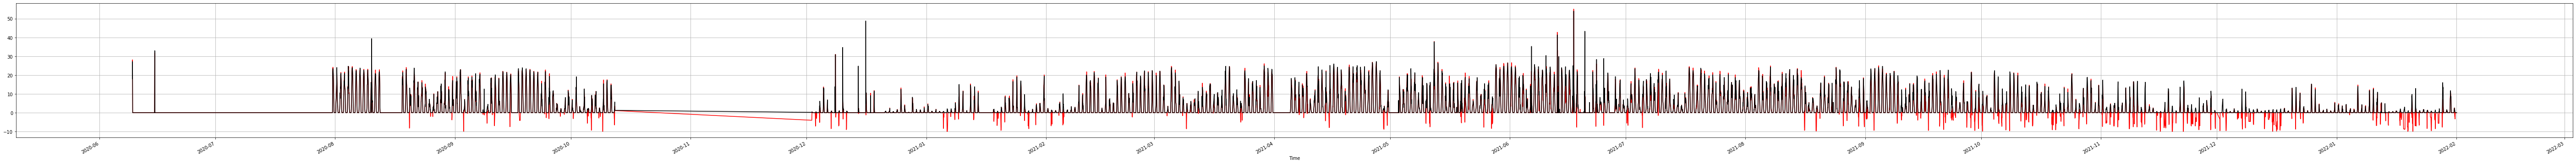

In [108]:
#fig1 = Grid_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(100,6), color='r')
fig1 = Grid_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())
#fig2 = PV_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(100,6), color='k')
fig2 = PV_hourly['Energy_kWh'].plot(figsize=(100,6), color='k')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

# EV charging data

In [109]:
Charge_hourly_raw = Grid_hourly_raw[['Energy_kWh']].copy()
Charge_hourly_raw['Energy_kWh'] = PV_hourly_raw['Energy_kWh'] - Grid_hourly_raw['Energy_kWh']

In [114]:
def markNaN(in_val):
    if (in_val < -10) or (in_val > 30):
        return np.NaN
    return in_val

def fixData(data_in):
    data_out = data_in
    
    data_out['Energy_kWh'] = data_in['Energy_kWh'].map(markNaN).copy()
    
    data_out = data_out.fillna(method='ffill')
    return data_out

In [115]:
Charge_hourly = fixData(Charge_hourly_raw)

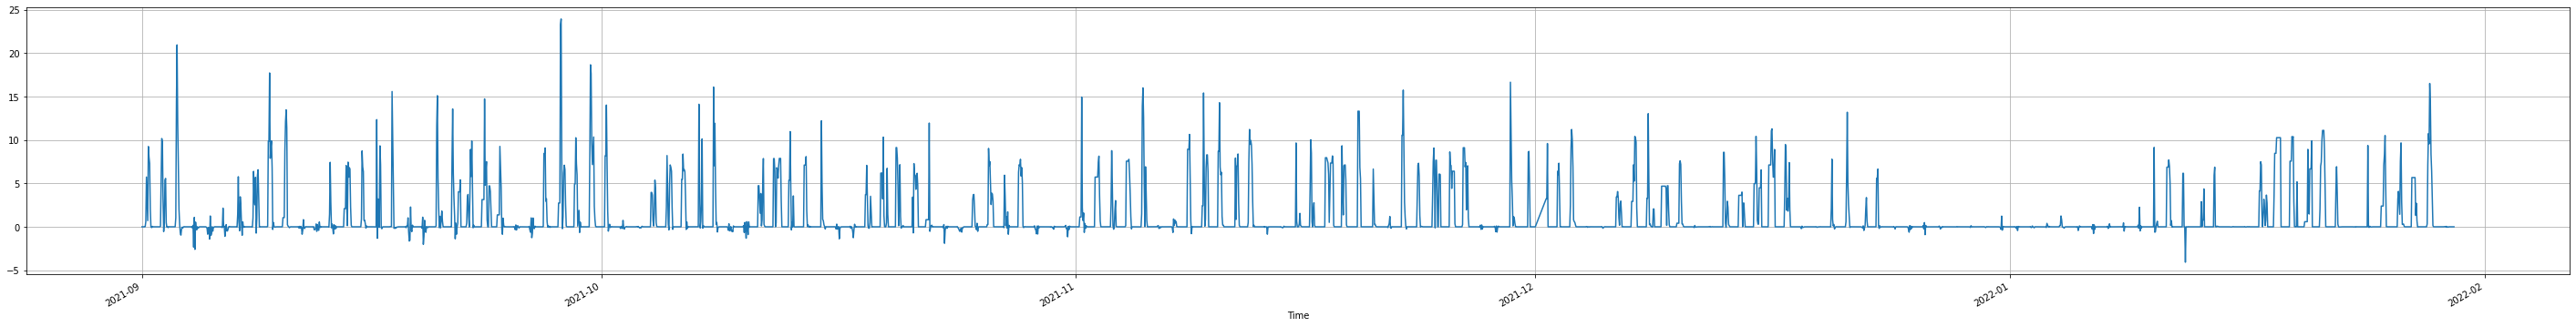

In [116]:
fig = Charge_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

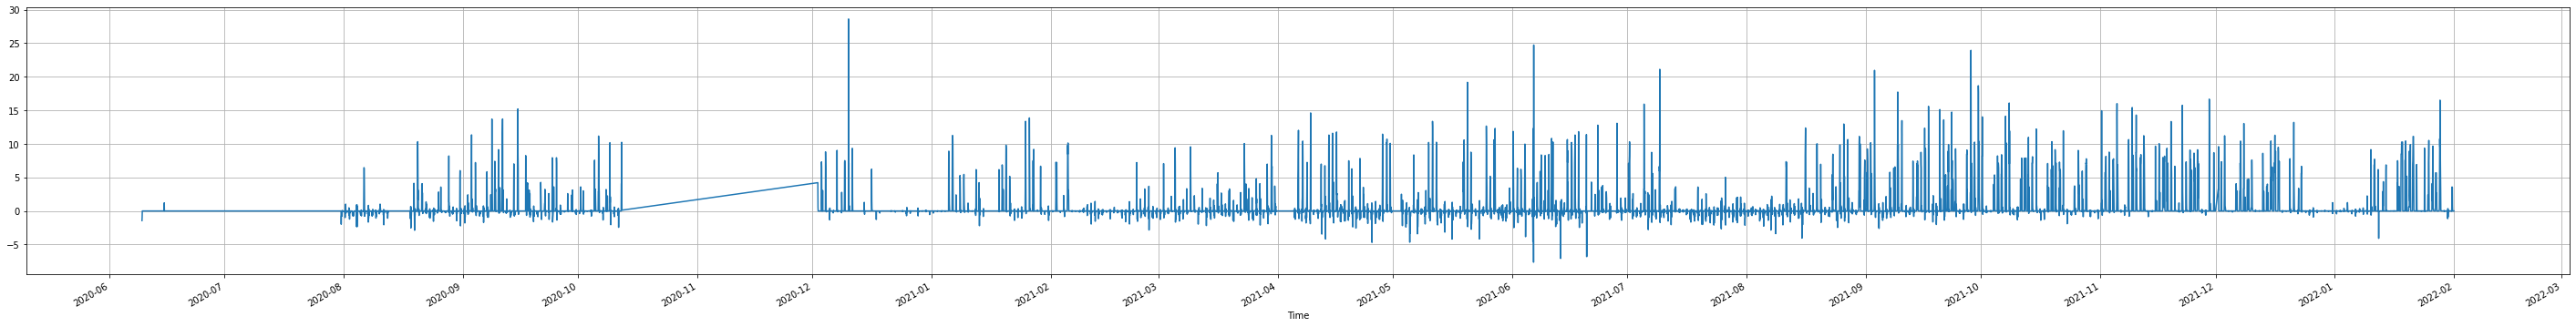

In [117]:
fig = Charge_hourly['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

In [51]:
Charge_hourly

,Energy_kWh
Time,
2020-12-02 09:00:00,4.213925
2020-12-02 10:00:00,0.546100
2020-12-02 11:00:00,-0.008600
2020-12-02 12:00:00,-0.008500
2020-12-02 13:00:00,0.005967
...,...
2022-01-31 21:00:00,0.000000
2022-01-31 22:00:00,0.000000
2022-01-31 23:00:00,0.000000


In [52]:
Charge_hourly['weekday']=Charge_hourly.index.day_of_week
Charge_hourly['hour']=Charge_hourly.index.hour

In [53]:
import holidays
Charge_hourly['hols'] = pd.Series(Charge_hourly.index).apply(lambda x: holidays.CountryHoliday('NL').get(x)).values

In [54]:
Charge_hourly['hols'].unique()

array([None, 'Eerste Kerstdag', 'Tweede Kerstdag', 'Nieuwjaarsdag',
       'Tweede paasdag', 'Koningsdag', 'Hemelvaart', 'Eerste Pinksterdag',
       'Tweede Pinksterdag'], dtype=object)

In [55]:
# Add HAN breaks
# https://www.hanuniversity.com/en/study-and-living/studying-at-han/academic-calendar/#
# https://schoolholidayseurope.eu/school-holidays-holland/
Charge_hourly.loc[(Charge_hourly.index > '2021-02-14 23:00:00') & (Charge_hourly.index < '2021-02-22 00:00:00'), 'hols'] = 'Spring holiday'
Charge_hourly.loc[(Charge_hourly.index > '2021-05-02 23:00:00') & (Charge_hourly.index < '2021-05-10 00:00:00'), 'hols'] = 'May holiday'
Charge_hourly.loc[(Charge_hourly.index > '2021-07-11 23:00:00') & (Charge_hourly.index < '2021-08-16 00:00:00'), 'hols'] = 'Summer break'
Charge_hourly.loc[(Charge_hourly.index > '2021-10-24 23:00:00') & (Charge_hourly.index < '2021-11-01 00:00:00'), 'hols'] = 'Fall holiday'
Charge_hourly.loc[(Charge_hourly.index > '2020-12-20 23:00:00') & (Charge_hourly.index < '2021-01-04 00:00:00'), 'hols'] = 'Winter break'
Charge_hourly.loc[(Charge_hourly.index > '2021-12-23 23:00:00') & (Charge_hourly.index < '2022-01-10 00:00:00'), 'hols'] = 'Winter break'

In [56]:
Charge_hourly

,Energy_kWh,weekday,hour,hols
Time,,,,
2020-12-02 09:00:00,4.213925,2,9,None
2020-12-02 10:00:00,0.546100,2,10,None
2020-12-02 11:00:00,-0.008600,2,11,None
2020-12-02 12:00:00,-0.008500,2,12,None
2020-12-02 13:00:00,0.005967,2,13,None
...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,None
2022-01-31 22:00:00,0.000000,0,22,None
2022-01-31 23:00:00,0.000000,0,23,None


In [57]:
#Charge_hourly.to_csv('./charge_hourly.csv')

# Analyse data

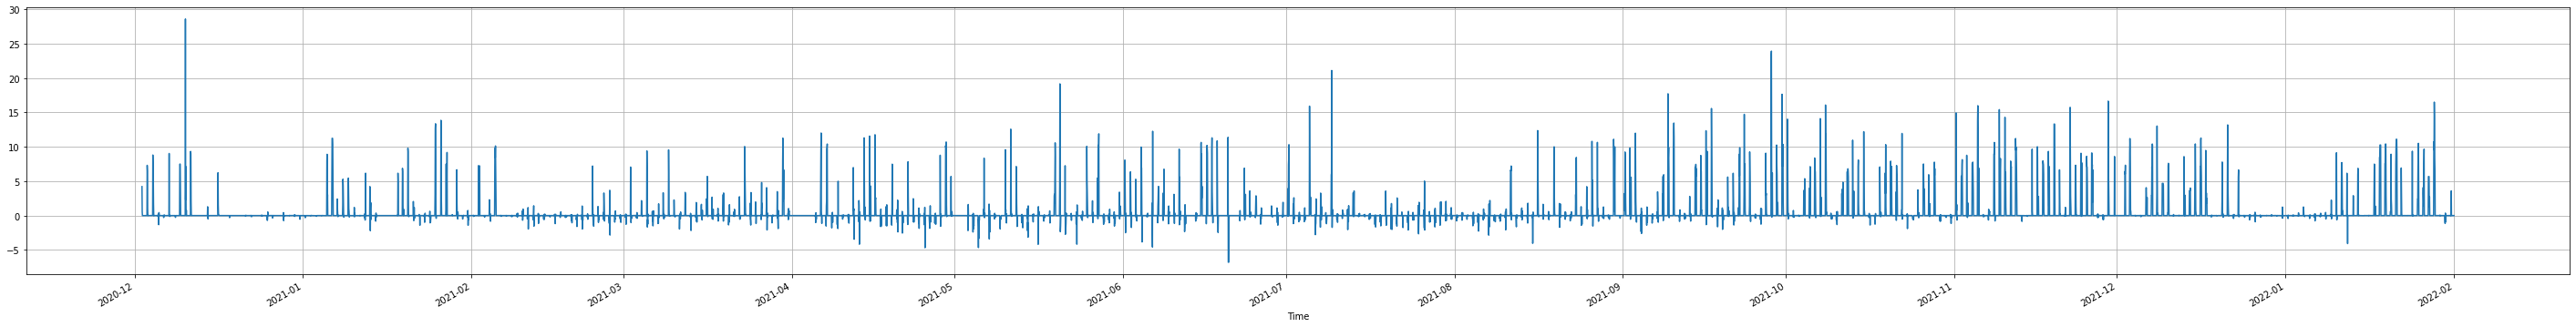

In [58]:
focus = Charge_hourly
focus['Energy_kWh'] = np.where((Charge_hourly.index.hour > 7) & (Charge_hourly.index.hour<14), Charge_hourly['Energy_kWh'], 0)
fig = focus['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

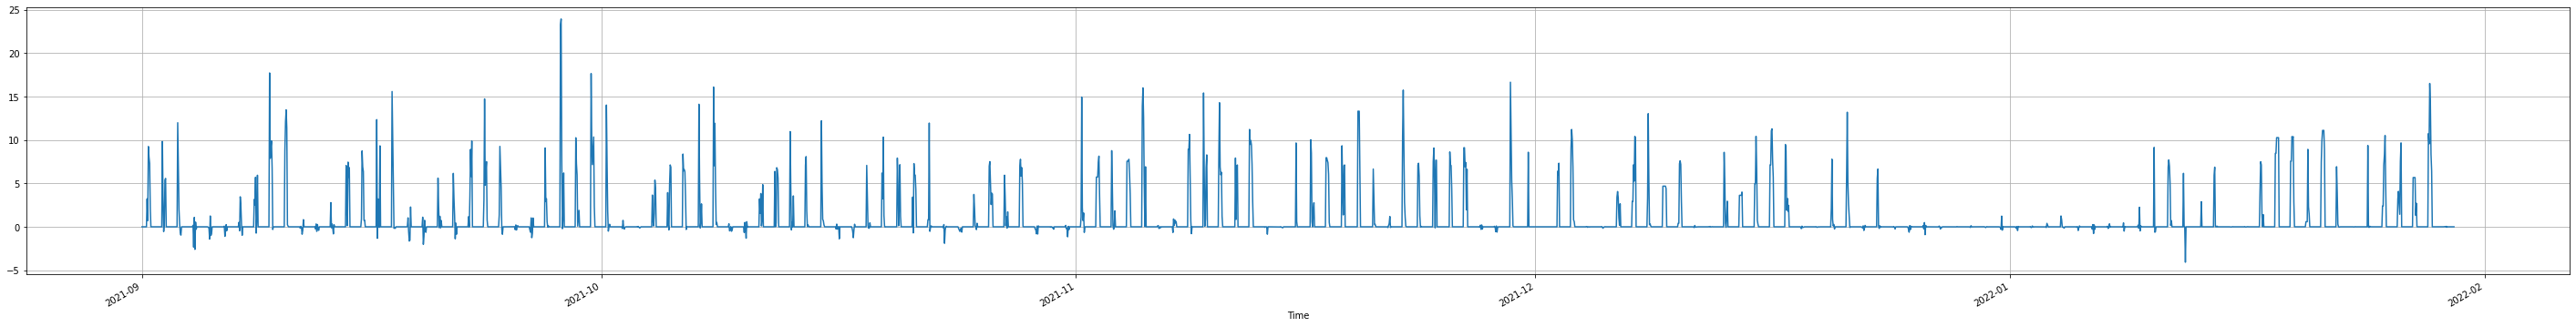

In [59]:
fig = focus.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

In [60]:
Charge_daily = Charge_hourly[['Energy_kWh']].groupby(pd.Grouper(freq='1D')).sum()

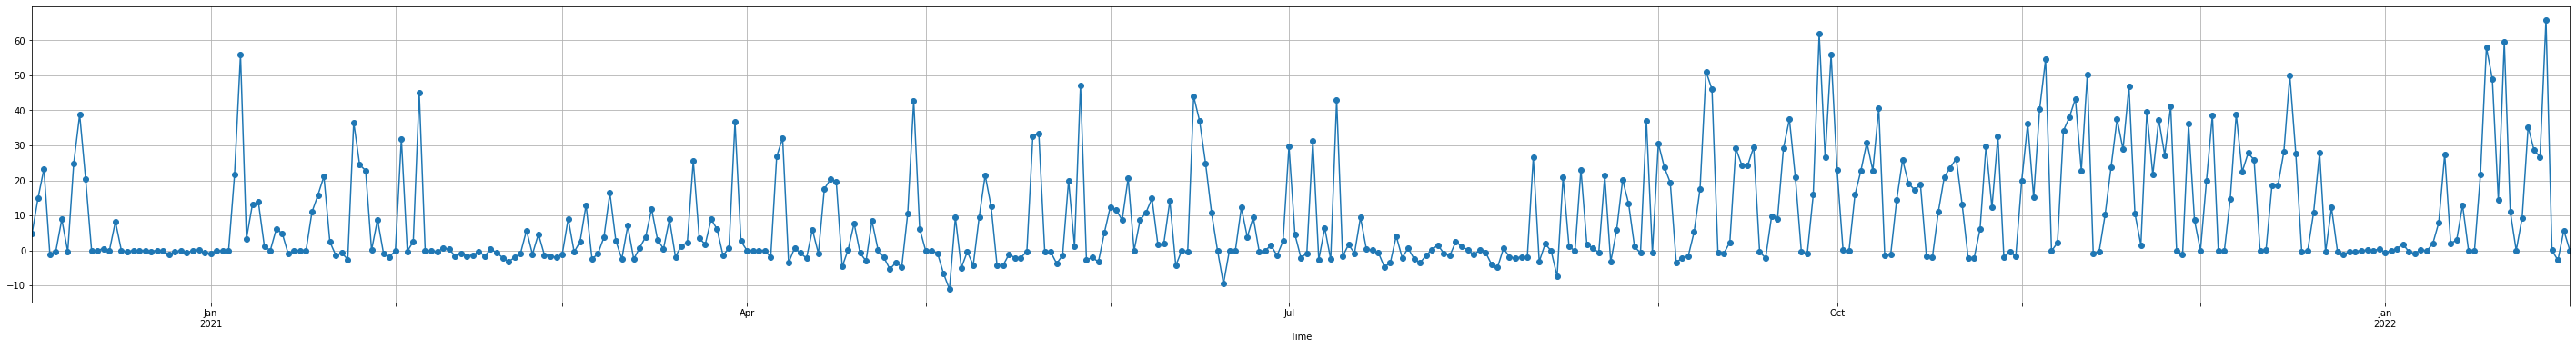

In [61]:
fig = Charge_daily['Energy_kWh'].plot(figsize=(50,6), marker='o')
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

The total charging demand is highest on Tuesday and Thursday, while the demand on a day is highest in early morning.

=> build a model based on this pattern

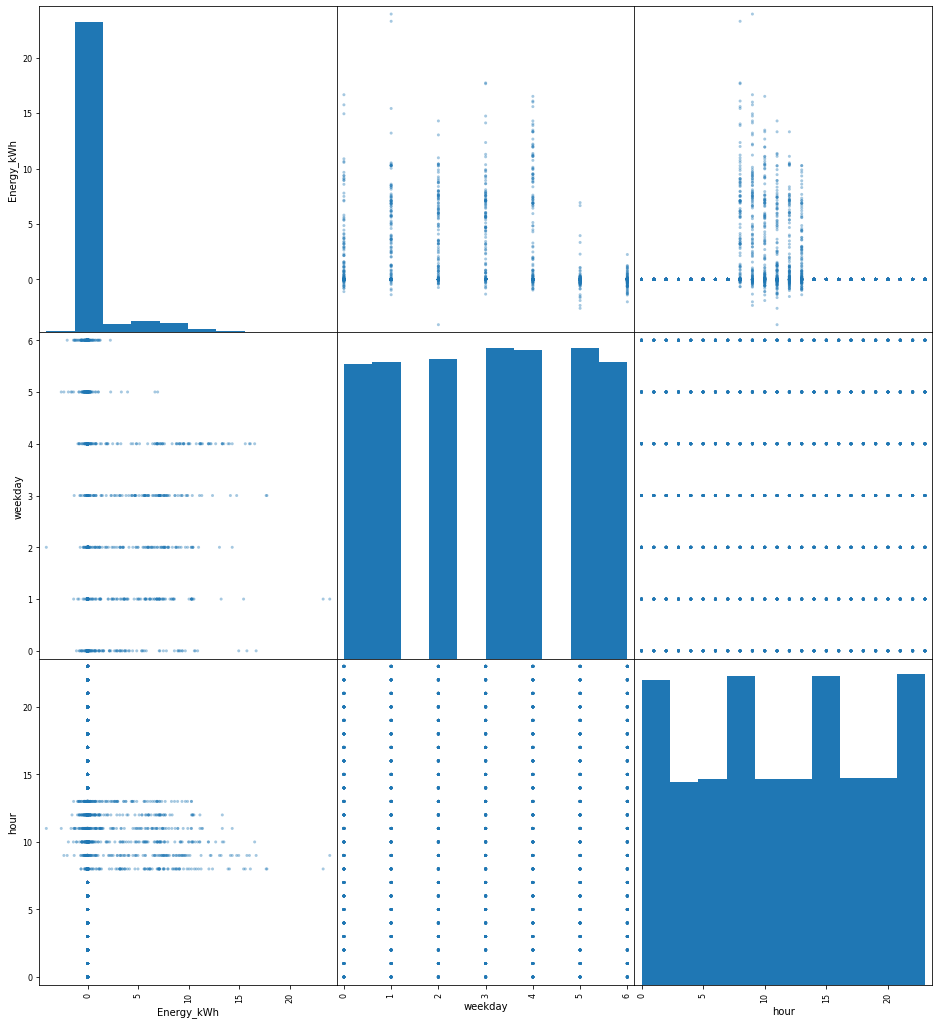

In [62]:
from pandas.plotting import scatter_matrix 
focus = Charge_hourly
focus['Energy_kWh'] = np.where((Charge_hourly.index.hour > 7) & (Charge_hourly.index.hour<14), Charge_hourly['Energy_kWh'], 0)
scatter_matrix(focus.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00',:], figsize=(16,18), alpha=0.4) 
plt.pyplot.show()

In [63]:
Charge_hourly_new = Charge_hourly[Charge_hourly.index > '2021-09-01 00:00:00']

In [64]:
Charge_hourly_new

,Energy_kWh,weekday,hour,hols
Time,,,,
2021-09-01 04:00:00,0.000000,2,4,None
2021-09-01 05:00:00,0.000000,2,5,None
2021-09-01 06:00:00,0.000000,2,6,None
2021-09-01 07:00:00,0.000000,2,7,None
2021-09-01 08:00:00,3.218242,2,8,None
...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,None
2022-01-31 22:00:00,0.000000,0,22,None
2022-01-31 23:00:00,0.000000,0,23,None


In [65]:
patMon = Charge_hourly_new[Charge_hourly_new.weekday == 0].groupby(['hour']).mean()
patMon.reset_index(inplace=True)
patTue = Charge_hourly_new[Charge_hourly_new.weekday == 1].groupby(['hour']).mean()
patTue.reset_index(inplace=True)
patWed = Charge_hourly_new[Charge_hourly_new.weekday == 2].groupby(['hour']).mean()
patWed.reset_index(inplace=True)
patThu = Charge_hourly_new[Charge_hourly_new.weekday == 3].groupby(['hour']).mean()
patThu.reset_index(inplace=True)
patFri = Charge_hourly_new[Charge_hourly_new.weekday == 4].groupby(['hour']).mean()
patFri.reset_index(inplace=True)
patSat = Charge_hourly_new[Charge_hourly_new.weekday == 5].groupby(['hour']).mean()
patSat.reset_index(inplace=True)
patSun = Charge_hourly_new[Charge_hourly_new.weekday == 6].groupby(['hour']).mean()
patSun.reset_index(inplace=True)

In [66]:
patWeek_Avg = pd.concat([patMon, patTue, patWed, patThu, patFri, patSat, patSun])
patWeek_Avg.reset_index(inplace=True)

In [67]:
patWeek_Avg.drop(['index'], axis=1, inplace=True)

<AxesSubplot:>

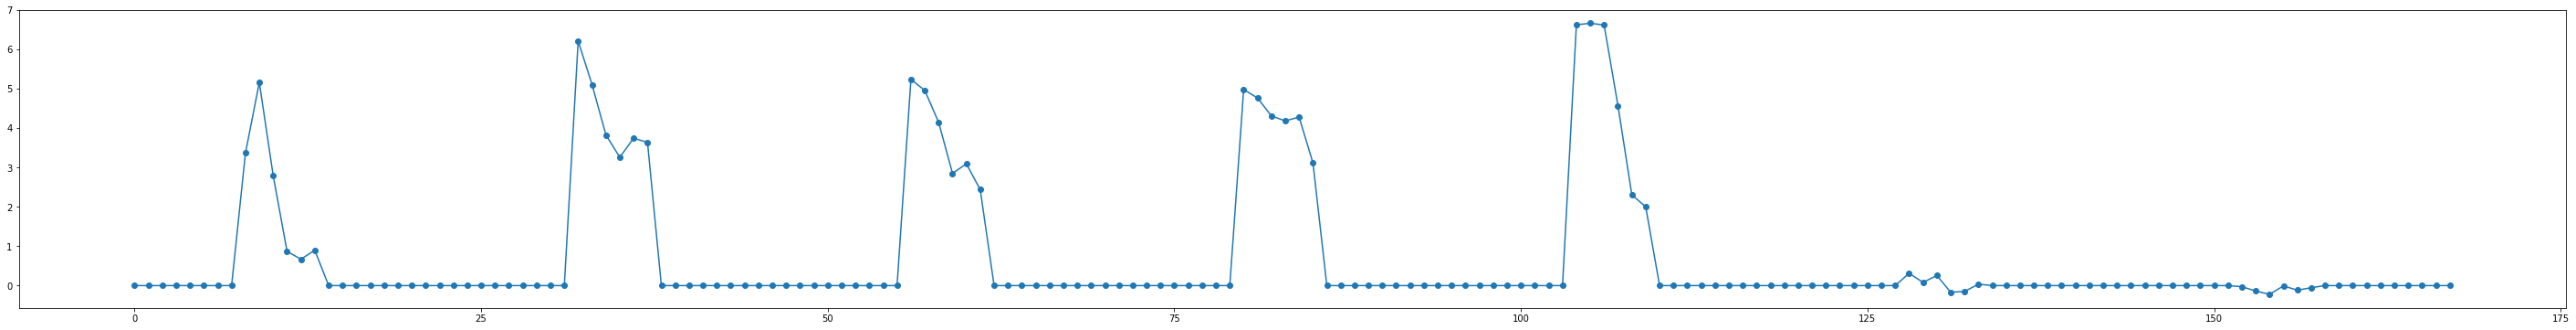

In [68]:
patWeek_Avg['Energy_kWh'].plot(figsize=(50,6), marker='o')

In [69]:
patWeek_Avg[(patWeek_Avg.weekday == 3) & (patWeek_Avg.hour == 9)]['Energy_kWh'].item()

4.7633897727272725

In [70]:
Charge_hourly_new['trend']=0
Charge_hourly_new

/tmp/ipykernel_35913/625284336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Charge_hourly_new['trend']=0


,Energy_kWh,weekday,hour,hols,trend
Time,,,,,
2021-09-01 04:00:00,0.000000,2,4,None,0
2021-09-01 05:00:00,0.000000,2,5,None,0
2021-09-01 06:00:00,0.000000,2,6,None,0
2021-09-01 07:00:00,0.000000,2,7,None,0
2021-09-01 08:00:00,3.218242,2,8,None,0
...,...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,None,0
2022-01-31 22:00:00,0.000000,0,22,None,0
2022-01-31 23:00:00,0.000000,0,23,None,0


In [71]:
Charge_hourly_Pred = Charge_hourly_new.copy()

for i in range(len(Charge_hourly_new)):
    day = Charge_hourly_new.iloc[i]['weekday']
    hour = Charge_hourly_new.iloc[i]['hour']
    prediction = patWeek_Avg[(patWeek_Avg.weekday == day) & (patWeek_Avg.hour == hour)]['Energy_kWh'].item()
    Charge_hourly_Pred.loc[Charge_hourly_new.index[i],'trend'] = prediction

<AxesSubplot:xlabel='Time'>

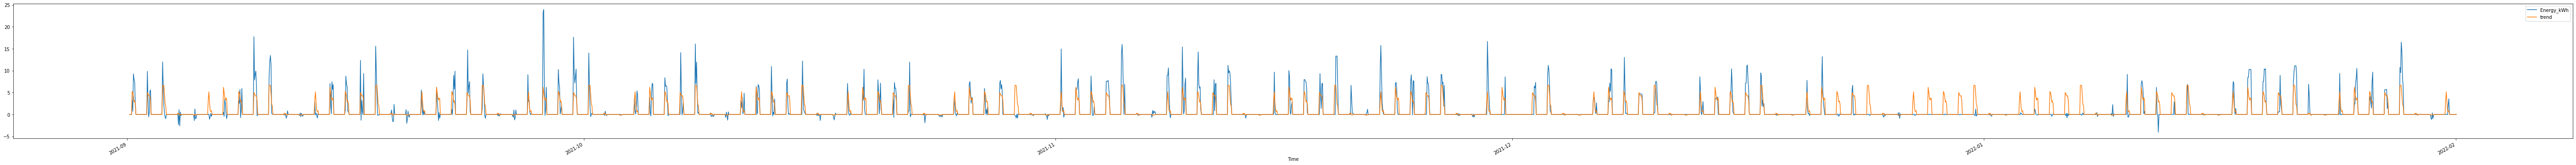

In [72]:
Charge_hourly_Pred.plot(y=['Energy_kWh', 'trend'], figsize=(100,6))

In [73]:
Charge_hourly_Pred.head(20)

,Energy_kWh,weekday,hour,hols,trend
Time,,,,,
2021-09-01 04:00:00,0.000000,2,4,None,0.000000
2021-09-01 05:00:00,0.000000,2,5,None,0.000000
2021-09-01 06:00:00,0.000000,2,6,None,0.000000
2021-09-01 07:00:00,0.000000,2,7,None,0.000000
2021-09-01 08:00:00,3.218242,2,8,None,5.235595
2021-09-01 09:00:00,0.710517,2,9,None,4.954581
2021-09-01 10:00:00,9.244908,2,10,None,4.144745
2021-09-01 11:00:00,8.028858,2,11,None,2.848656
2021-09-01 12:00:00,7.299417,2,12,None,3.091811


In [74]:
Charge_hourly_Pred['prediction']=0

In [75]:
for i in range(1, len(Charge_hourly_Pred)):
    diff = Charge_hourly_Pred.iloc[i-1]['Energy_kWh'] - Charge_hourly_Pred.iloc[i-1]['trend']
    Charge_hourly_Pred.loc[Charge_hourly_Pred.index[i],'prediction'] = Charge_hourly_Pred.loc[Charge_hourly_Pred.index[i],'trend'] + diff

In [76]:
Charge_hourly_Pred.head(20)

,Energy_kWh,weekday,hour,hols,trend,prediction
Time,,,,,,
2021-09-01 04:00:00,0.000000,2,4,None,0.000000,0.000000
2021-09-01 05:00:00,0.000000,2,5,None,0.000000,0.000000
2021-09-01 06:00:00,0.000000,2,6,None,0.000000,0.000000
2021-09-01 07:00:00,0.000000,2,7,None,0.000000,0.000000
2021-09-01 08:00:00,3.218242,2,8,None,5.235595,5.235595
2021-09-01 09:00:00,0.710517,2,9,None,4.954581,2.937228
2021-09-01 10:00:00,9.244908,2,10,None,4.144745,-0.099319
2021-09-01 11:00:00,8.028858,2,11,None,2.848656,7.948819
2021-09-01 12:00:00,7.299417,2,12,None,3.091811,8.272013


<AxesSubplot:xlabel='Time'>

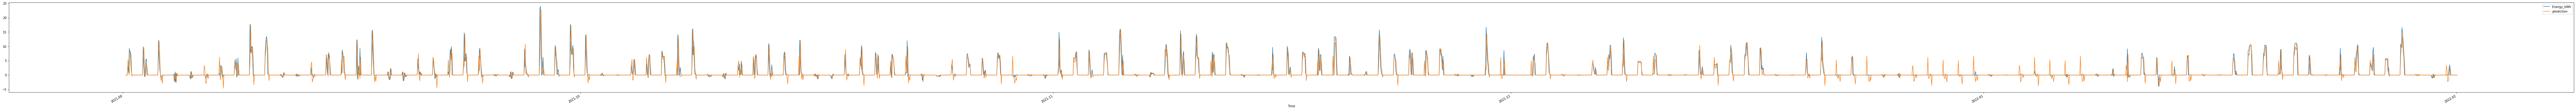

In [77]:
Charge_hourly_Pred.plot(y=['Energy_kWh', 'prediction'], figsize=(150,6))

In [78]:
Grid0322 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030122.csv')
PV0322 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030122.csv')

In [79]:
Grid0322_hourly = extract_data(Grid0322)
PV0322_hourly = extract_data(PV0322)

In [80]:
Grid0322_hourly

,Energy,Energy_kWh
Time,,
2022-02-01 05:00:00,0.0,0.000000
2022-02-01 06:00:00,-11991420.0,-3.330950
2022-02-01 07:00:00,-48314520.0,-13.420700
2022-02-01 08:00:00,-72918840.0,-20.255233
2022-02-01 09:00:00,-47977950.0,-13.327208
...,...,...
2022-02-28 21:00:00,0.0,0.000000
2022-02-28 22:00:00,0.0,0.000000
2022-02-28 23:00:00,0.0,0.000000


In [81]:
PV0322_hourly

,Energy,Energy_kWh
Time,,
2022-02-01 05:00:00,0.0,0.000000
2022-02-01 06:00:00,0.0,0.000000
2022-02-01 07:00:00,0.0,0.000000
2022-02-01 08:00:00,426240.0,0.118400
2022-02-01 09:00:00,1639170.0,0.455325
...,...,...
2022-02-28 20:00:00,0.0,0.000000
2022-02-28 21:00:00,0.0,0.000000
2022-02-28 22:00:00,0.0,0.000000


In [82]:
Grid0322 = Grid0322_hourly.iloc[:668,:]

In [83]:
Charge0322_hourly = Grid0322_hourly[['Energy_kWh']].copy()
Charge0322_hourly['Energy_kWh'] = PV0322_hourly['Energy_kWh'] - Grid0322_hourly['Energy_kWh']

<AxesSubplot:xlabel='Time'>

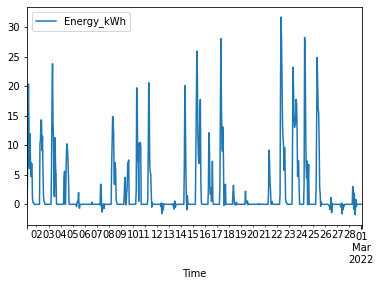

In [84]:
Charge0322_hourly.plot()

In [85]:
Charge0322_hourly['weekday']=Charge0322_hourly.index.day_of_week
Charge0322_hourly['hour']=Charge0322_hourly.index.hour

In [86]:
Charge0322_hourly

,Energy_kWh,weekday,hour
Time,,,
2022-02-01 05:00:00,0.000000,1,5
2022-02-01 06:00:00,3.330950,1,6
2022-02-01 07:00:00,13.420700,1,7
2022-02-01 08:00:00,20.373633,1,8
2022-02-01 09:00:00,13.782533,1,9
...,...,...,...
2022-02-28 21:00:00,0.000000,0,21
2022-02-28 22:00:00,0.000000,0,22
2022-02-28 23:00:00,0.000000,0,23


In [87]:
Charge0322_hourly_Pred = Charge0322_hourly.copy()

Charge0322_hourly_Pred['trend'] = 0

for i in range(len(Charge0322_hourly)):
    day = Charge0322_hourly_Pred.iloc[i]['weekday']
    hour = Charge0322_hourly_Pred.iloc[i]['hour']
    prediction = patWeek_Avg[(patWeek_Avg.weekday == day) & (patWeek_Avg.hour == hour)]['Energy_kWh'].item()
    Charge0322_hourly_Pred.loc[Charge0322_hourly_Pred.index[i],'trend'] = prediction

<AxesSubplot:xlabel='Time'>

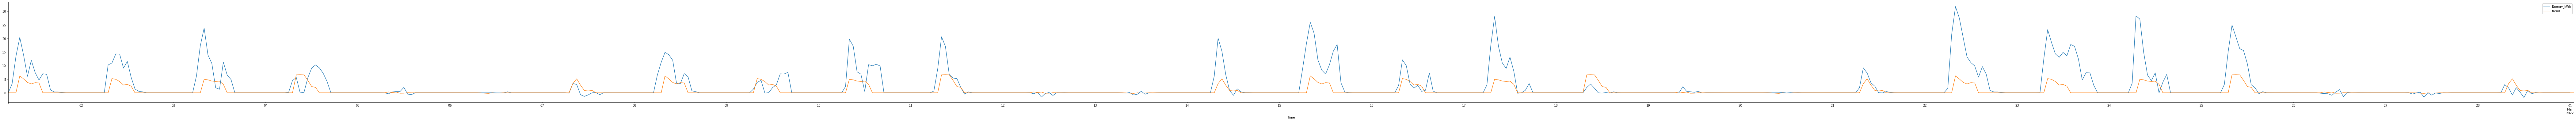

In [88]:
Charge0322_hourly_Pred.plot(y=['Energy_kWh', 'trend'], figsize=(150,6))

In [89]:
Charge0322_hourly_Pred['prediction']=0

In [90]:
for i in range(1, len(Charge0322_hourly_Pred)):
    diff = Charge0322_hourly_Pred.iloc[i-1]['Energy_kWh'] - Charge0322_hourly_Pred.iloc[i-1]['trend']
    Charge0322_hourly_Pred.loc[Charge0322_hourly_Pred.index[i],'prediction'] = Charge0322_hourly_Pred.loc[Charge0322_hourly_Pred.index[i],'trend'] + diff

<AxesSubplot:xlabel='Time'>

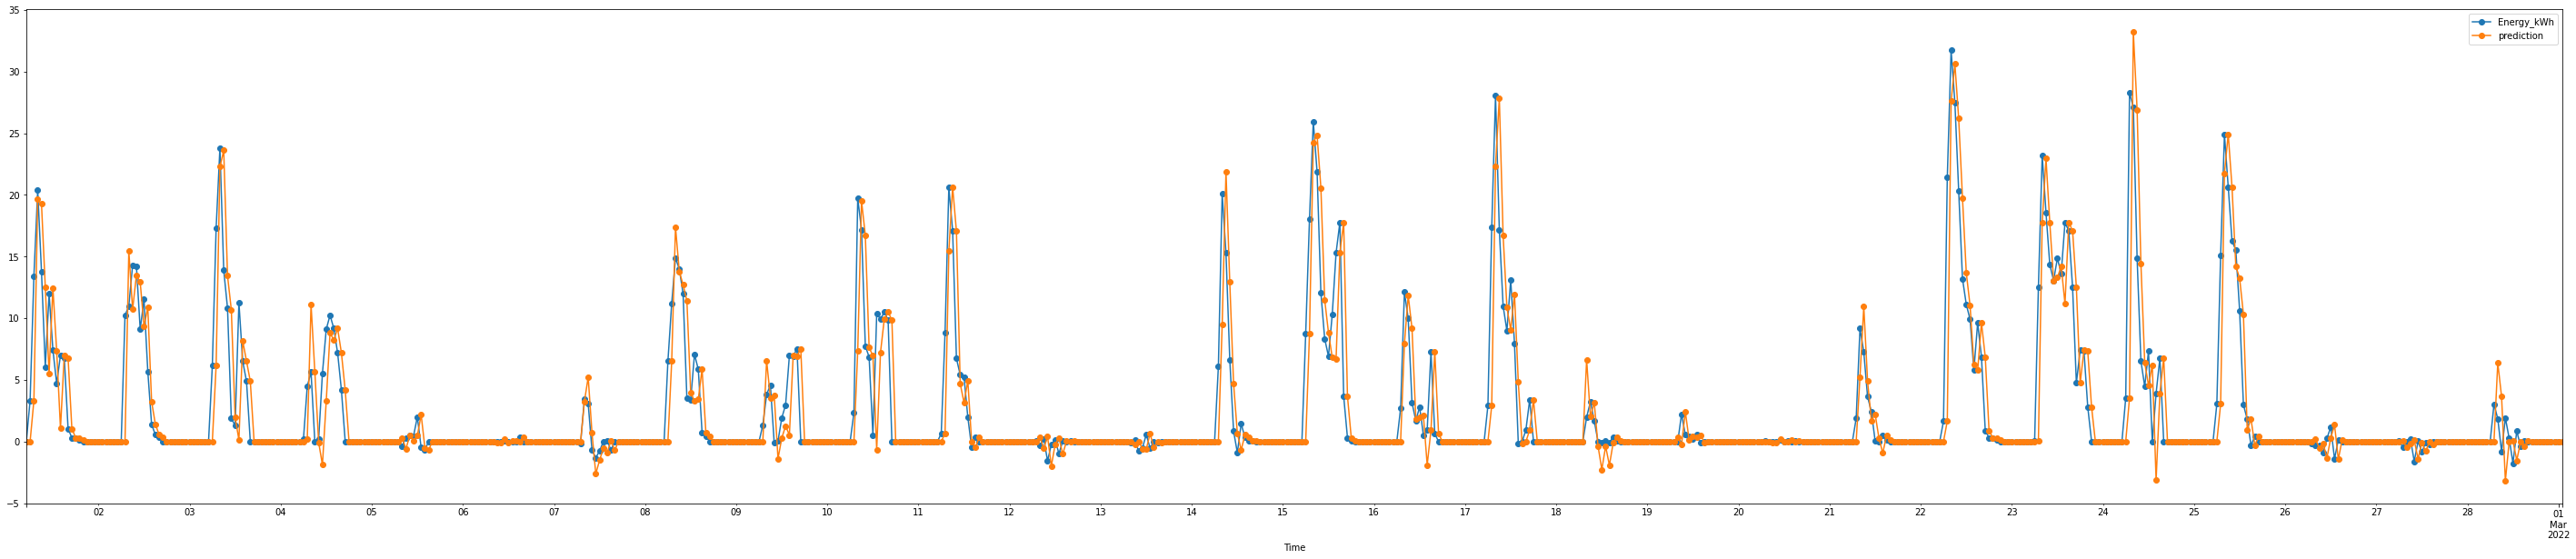

In [91]:
Charge0322_hourly_Pred.plot(y=['Energy_kWh', 'prediction'], figsize=(50,10), marker='o')

In [92]:
Charge0322_hourly_Pred['lag'] = Charge0322_hourly_Pred['Energy_kWh'].shift(periods=1)

<AxesSubplot:xlabel='Time'>

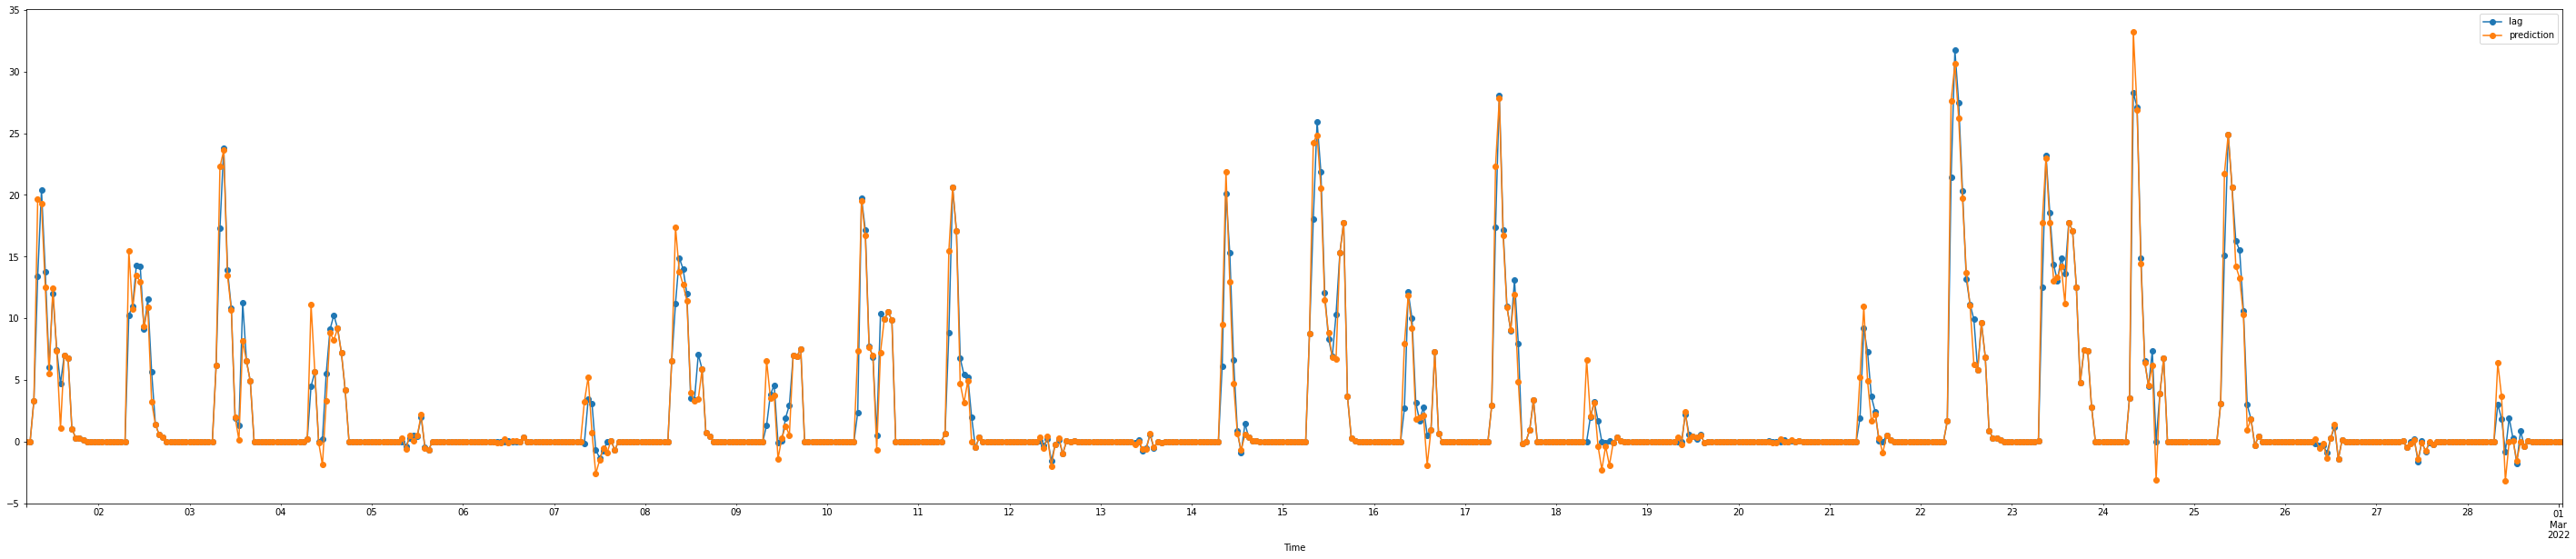

In [93]:
Charge0322_hourly_Pred.plot(y=['lag', 'prediction'], figsize=(50,10), marker='o')